In [3]:
import torch
import torchvision
from torchvision import transforms, datasets
# Training dataset. Download and "train" on it
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

# Test dataset. Download byut don't "train" on it
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [6]:
"""
@batch_size = size of the data that you feed to the model one at a time. It allows
training on big datasets in chunks. Another benefit of batches is reducing the risk of
overfitting. Model will figure out "strongest" properties between the batches
@shuffle - shuffle dataset. E.g. MNEST is dataset of hand drawn numbers (28x28 pixels). When dataset is shuffled, we'll ensure that we have different numbers in the dataset, instead of first feeding all 0's, then 1's and so on
"""
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [11]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

torch.Size([1, 28, 28])


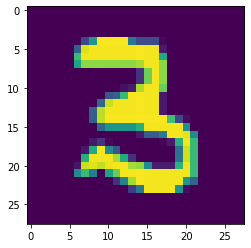

In [18]:
import matplotlib.pyplot as plt

"""
plt.imshow expects a size of the image as an argument, which with our images would be 28x28, however, if we check the .shape of the image, we see that '1' is added by pytorch. In order to show this image, we need use .view attribute
"""
x, y = data[0][0], data[1][0]
print(x.shape)
plt.imshow(x.view(28, 28))
plt.show()

In [29]:
from collections import Counter
"""
To confirm that our dataset is balanced we can count the occurences of elements in dataset
"""
total = 0
counter = {key: 0 for key in range(10)}

for data in trainset:
    Xs, Ys = data
    for y in Ys:
        counter[int(y)]+=1
        total+=1
print(counter)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [30]:
# show element occurence in percentage
for i in counter:
    print(f'{i}: {counter[i]/total*100}')

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001
